# Similarities and Differences between Categories (Pt.1 - Age, Gender, Won/Lost Amount)

In [1]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf
import counting_fns as cf

month_file = '5_September'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


In [2]:
# Read in data
df = pd.read_parquet("top_players.parquet")

# Round wageredamt and profit to 2 decimal places
df['wageredamt'] = df['wageredamt'].round(1)
df['profit'] = df['profit'].round(1)
df['percent_return'] = df['percent_return'].round(1)


In [3]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df['result_type'] = df['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df = pd.concat([df, dummy_variables], axis=1).reset_index(drop=True)

# Convert starttime to delte format for operations
df['start_time'] = pd.to_datetime(df['start_time'])

In [4]:
# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df['time_diff'] = df.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df['time_diff'] = df['time_diff'].dt.total_seconds().fillna(0)

## General Overview

### Players, Visits, Sessions of Each Group

In [5]:
# Number of gamblers
print("Number of gamblers in dataframe:", len(df['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in dtf:", len(df['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in dtf:", len(df['session_time'].unique()))
print('--------------------------------------------------')

Number of gamblers in dataframe: 1122
--------------------------------------------------
Number of unique visits in dtf: 18
--------------------------------------------------
Number of unique sessions in dtf: 10
--------------------------------------------------


### Wins in a row

In [6]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_s = pf.consecutive_wins(df, 'session_time')

In [7]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per session:')
print(df_s.groupby(['clasification', 'session_time'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')

Categories of wins in a row per session:
                              #2ws    #3ws   #4ws
clasification session_time                       
top_1         1             4919.0   925.0  289.0
              2             2679.0   504.0  164.0
              3             1354.0   240.0   78.0
              4              626.0    86.0   24.0
              5              371.0    85.0   28.0
              6               76.0    14.0    2.0
              7               32.0     4.0    0.0
              8                7.0     1.0    1.0
top_10        1             7109.0  1269.0  376.0
              2             2351.0   388.0  128.0
              3              843.0   176.0   39.0
              4              290.0    45.0   10.0
              5               42.0     6.0    1.0
              6                9.0     1.0    1.0
              7                5.0     2.0    0.0
              8                3.0     0.0    0.0
top_5         1             8915.0  1680.0  488.0
         

In [8]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per session_time per player
df = pf.consecutive_wins(df, 'visit')

In [9]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per visit:')
print(df.groupby(['clasification', 'visit'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')


Categories of wins in a row per visit:
                       #2ws    #3ws   #4ws
clasification visit                       
top_1         1      2513.0   457.0  127.0
              2      2968.0   508.0  135.0
              3      2065.0   416.0  137.0
              4      1357.0   236.0   75.0
              5       491.0    79.0   28.0
              6       292.0    69.0   37.0
              7       125.0    24.0    9.0
              8        38.0    12.0    6.0
              9        31.0    15.0    8.0
              10       54.0    13.0   11.0
              11       35.0     8.0    5.0
              12       13.0     6.0    2.0
              13       39.0    11.0    3.0
              14       19.0     3.0    1.0
              15        6.0     0.0    0.0
              16        5.0     0.0    1.0
              17        5.0     1.0    0.0
              18        5.0     1.0    0.0
top_10        1      5091.0   872.0  261.0
              2      3590.0   658.0  191.0
              3

### Gender Differences

In [10]:
# Gender differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'gender'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  gender
top_1          F          52
               M          62
top_10         F         269
               M         291
top_5          F         211
               M         237
Name: playerkey, dtype: int64
--------------------------------------------------


### Age Differences

In [11]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for dtf and top 20%
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_gen'] = pd.cut(df['age'], bins=bins, labels=generations, right=False)

df_s['age_range'] = pd.cut(df_s['age'], bins=bins, labels=labels, right=False)
df_s['age_gen'] = pd.cut(df_s['age'], bins=bins, labels=generations, right=False)

In [12]:
# Age range differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_range'])['playerkey'].nunique())
print('--------------------------------------------------')


Number of unique players in dtf:
clasification  age_range
top_1          18-24          0
               25-40         10
               41-55         41
               56-75         57
               76+            6
top_10         18-24          3
               25-40        103
               41-55        206
               56-75        228
               76+           20
top_5          18-24          0
               25-40         52
               41-55        170
               56-75        207
               76+           19
Name: playerkey, dtype: int64
--------------------------------------------------


In [13]:
# Age range differences
print("Number of unique players in dtf:")
print(df_s.groupby(['clasification', 'age_gen'])['playerkey'].nunique())

Number of unique players in dtf:
clasification  age_gen     
top_1          Gen Z             0
               Millenials       10
               Gen X            41
               Baby Boomers     57
               Silent            6
top_10         Gen Z             3
               Millenials      103
               Gen X           206
               Baby Boomers    228
               Silent           20
top_5          Gen Z             0
               Millenials       52
               Gen X           170
               Baby Boomers    207
               Silent           19
Name: playerkey, dtype: int64


In [14]:
# Age generation differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_gen'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  age_gen     
top_1          Gen Z             0
               Millenials       10
               Gen X            41
               Baby Boomers     57
               Silent            6
top_10         Gen Z             3
               Millenials      103
               Gen X           206
               Baby Boomers    228
               Silent           20
top_5          Gen Z             0
               Millenials       52
               Gen X           170
               Baby Boomers    207
               Silent           19
Name: playerkey, dtype: int64
--------------------------------------------------


Male age differences in dtf:
age_range
18-24      1
25-40     99
41-55    233
56-75    239
76+       18
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in dtf:
age_range
18-24      2
25-40     66
41-55    184
56-75    253
76+       27
Name: playerkey, dtype: int64


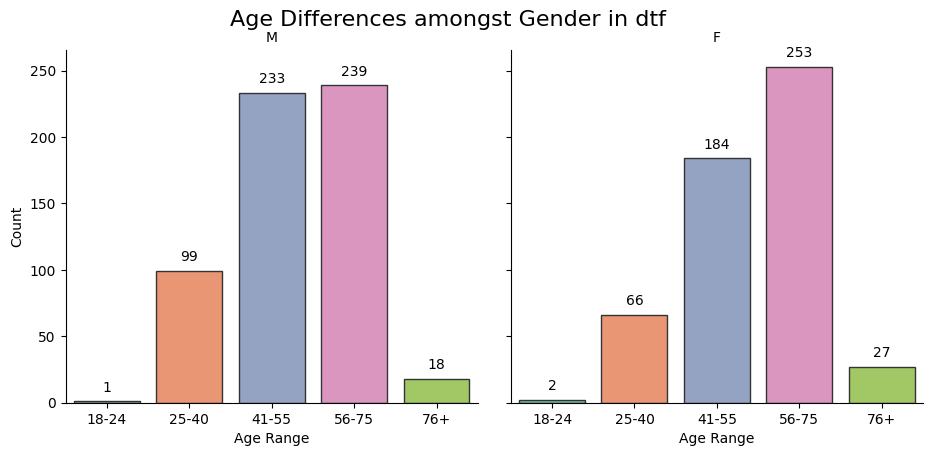

In [15]:
# Age range of male gamblers in dtf
print("Male age differences in dtf:")
print(df[df['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in dtf
print('Female age differences in dtf:')
print(df[df['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df, 'dtf', figsize=(10, 5))


### Increse and Decrease of SlotDenomination and Bet

In [16]:
# Lets do the same but for bottom 20%
players_increase_slot = cf.count_increase(df, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot = cf.count_decrease(df, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet = cf.count_increase(df, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet = cf.count_decrease(df, "decrease_maxbet", "playerkey", "maxbet")


Count of players who increase_slotdeno : 931
Count of times each player increase_slotdeno : {156: 24, 224: 7, 336: 9, 865: 1, 1069: 3, 1166: 73, 1402: 3, 1438: 1849, 2073: 7, 3840: 3, 4483: 37, 5147: 4, 5179: 3, 5673: 2, 6284: 12, 6695: 4, 8978: 10, 9191: 1, 9197: 7, 9669: 1, 12857: 4, 15956: 43, 19568: 3, 21209: 34, 21722: 1, 23329: 17, 24787: 1, 26097: 6, 30426: 13, 30688: 5, 30903: 3, 30970: 14, 31137: 130, 31226: 7, 31456: 37, 31606: 263, 31688: 6, 31698: 2, 31739: 4, 31959: 1, 31977: 4, 32192: 396, 32280: 1, 33143: 2, 33286: 40, 33351: 3, 33364: 1, 33458: 4, 33920: 366, 34209: 133, 34251: 1, 34252: 1, 34393: 1, 34401: 1, 34677: 2, 34837: 6, 34962: 1, 35252: 2, 35414: 13, 35559: 569, 35649: 1, 35670: 31, 35673: 3, 35677: 6, 35865: 6, 35990: 2, 36119: 214, 36256: 198, 36358: 274, 36499: 5, 36627: 5, 36674: 26, 36691: 6, 36702: 11, 36861: 2, 37008: 48, 37028: 6, 37135: 26, 37509: 32, 37798: 7, 38466: 9, 38683: 2, 38956: 3, 39255: 11, 39286: 381, 39295: 1, 39335: 8, 39419: 6, 39438: 1

In [17]:
# Lets do the same but for df_s
players_increase_slot_s = cf.count_increase(df_s, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_s = cf.count_decrease(df_s, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_s = cf.count_increase(df_s, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_s = cf.count_decrease(df_s, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 931
Count of times each player increase_slotdeno : {156: 24, 224: 7, 336: 9, 865: 1, 1069: 3, 1166: 73, 1402: 3, 1438: 1849, 2073: 7, 3840: 3, 4483: 37, 5147: 4, 5179: 3, 5673: 2, 6284: 12, 6695: 4, 8978: 10, 9191: 1, 9197: 7, 9669: 1, 12857: 4, 15956: 43, 19568: 3, 21209: 34, 21722: 1, 23329: 17, 24787: 1, 26097: 6, 30426: 13, 30688: 5, 30903: 3, 30970: 14, 31137: 130, 31226: 7, 31456: 37, 31606: 263, 31688: 6, 31698: 2, 31739: 4, 31959: 1, 31977: 4, 32192: 396, 32280: 1, 33143: 2, 33286: 40, 33351: 3, 33364: 1, 33458: 4, 33920: 366, 34209: 133, 34251: 1, 34252: 1, 34393: 1, 34401: 1, 34677: 2, 34837: 6, 34962: 1, 35252: 2, 35414: 13, 35559: 569, 35649: 1, 35670: 31, 35673: 3, 35677: 6, 35865: 6, 35990: 2, 36119: 214, 36256: 198, 36358: 274, 36499: 5, 36627: 5, 36674: 26, 36691: 6, 36702: 11, 36861: 2, 37008: 48, 37028: 6, 37135: 26, 37509: 32, 37798: 7, 38466: 9, 38683: 2, 38956: 3, 39255: 11, 39286: 381, 39295: 1, 39335: 8, 39419: 6, 39438: 1

### Wealth Differences
#### General

In [18]:
# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df['depletion_rate'] = df.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)

# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df_s['depletion_rate'] = df_s.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)


#### Per Visit

In [19]:
# Create dataframe for Machine Learning model
df_ML_v = pf.transform_ml(data_b=df, grouping='visit')

In [20]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_v['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_v = df_ML_v[df_ML_v.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_v))

# Remove players with NaN values
df_ML_v = df_ML_v[~df_ML_v['playerkey'].isin(list_discrepancy_v)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_v['playerkey'].nunique())

Number of unique players in df_ML_v:  1122
Number of discrepancies: 35
Number of unique players w/o discrepancies:  1087


In [21]:
print(df_ML_v.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'visit', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']


df_ML_v = df_ML_v.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/top_players_ending_balance_by_visit.parquet')

Index(['playerkey', 'visit', 'gender', 'age_range', 'age_gen', 'beginning_amt',
       'ending_amt', 'ending_balance', 'ave_slotdenom', 'std_slotdenom',
       'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '2ws/min

#### Per Session

In [22]:
df_ML_s = pf.transform_ml(data_b=df_s, grouping='session_time')

In [23]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_s['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_s = df_ML_s[df_ML_s.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_s))

# Remove players with NaN values
df_ML_s = df_ML_s[~df_ML_s['playerkey'].isin(list_discrepancy_s)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_s['playerkey'].nunique())

Number of unique players in df_ML_v:  1122
Number of discrepancies: 40
Number of unique players w/o discrepancies:  1082


In [24]:
print(df_ML_s.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']

df_ML_s = df_ML_s.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/top_player_ending_balance_by_session.parquet')


Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '